# Initialize

## Load libraries

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

# Define functions

In [2]:
# Function that returns the mean of the values in the array x
def expval(x):
    n = np.size(x)
    return(sum(x)/n)

# Function that returns the standard deviation of the values in the array x
def sigma(x):
    n = np.size(x)
    return np.sqrt((expval(x**2)-expval(x)**2))

# Function that returns the empirical standard deviation of the values in the array x
def empsigma(x):
    n = np.size(x)
    return np.sqrt(n/(n-1)*(expval(x**2)-expval(x)**2))

# Standard error

In [3]:
# Number of data sets
m=500

# Parameter for Normal distribution
exp = 1
std = 0.5

# Number of samples per data set
n = np.linspace(1,m,m,dtype='int16')
# Number of samples contributing to the calculated moments
n_c = np.linspace(1,m-1,m-1,dtype='int16')
# Empty arrays for each momentum we want to calculate
x = np.zeros(m)     # Random variable
mu = np.zeros(m-1)    # empirical mean
es = np.zeros(m-1)    # empirical standard deviation
s_mu = np.zeros(m-1)  # error of the mean (standard error)


# Generate normally distributed data
for i in range(0,m):
    x[i] = np.random.normal(exp,std)
    
    if (i>0):
        # Calculation of the moments of the distribution of the measurement for ever growing sample size
        mu[i-1] = expval(x[0:i+1])
        es[i-1] = empsigma(x[0:i+1])
        s_mu[i-1] = es[i-1]/np.sqrt(i+1)

# Plot results

## Plot data

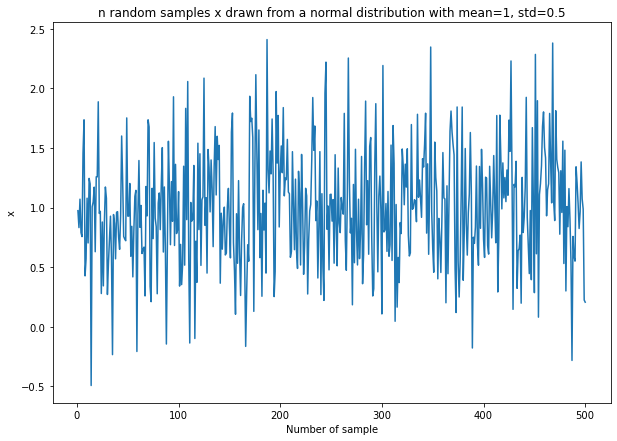

In [4]:
plt.figure(
    figsize=(10,7),
    facecolor='white')
plt.xlabel('Number of sample')
plt.ylabel('x')
plt.title('n random samples x drawn from a normal distribution with mean=%d, std=%0.1f' %(exp ,std))
plt.plot(n,x)
nbins = plt.show()

## Plot histogram

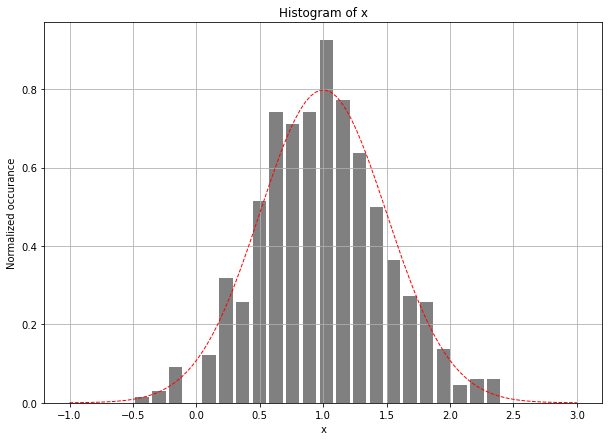

In [5]:
nbins = np.int16(np.sqrt(m))

plt.figure(
    figsize=(10,7),
    facecolor='white')

h, bins, patches = plt.hist(x,nbins, density=True, rwidth=0.8, facecolor='grey')

cbins=np.linspace(exp-4*std,exp+4*std,100)

y = scipy.stats.norm.pdf(cbins, exp, std)

plt.plot(cbins, y, 'r--', linewidth=1)

plt.xlabel('x')
plt.ylabel('Normalized occurance')
plt.title('Histogram of x')
plt.grid(True)

plt.show()

## Plot moments

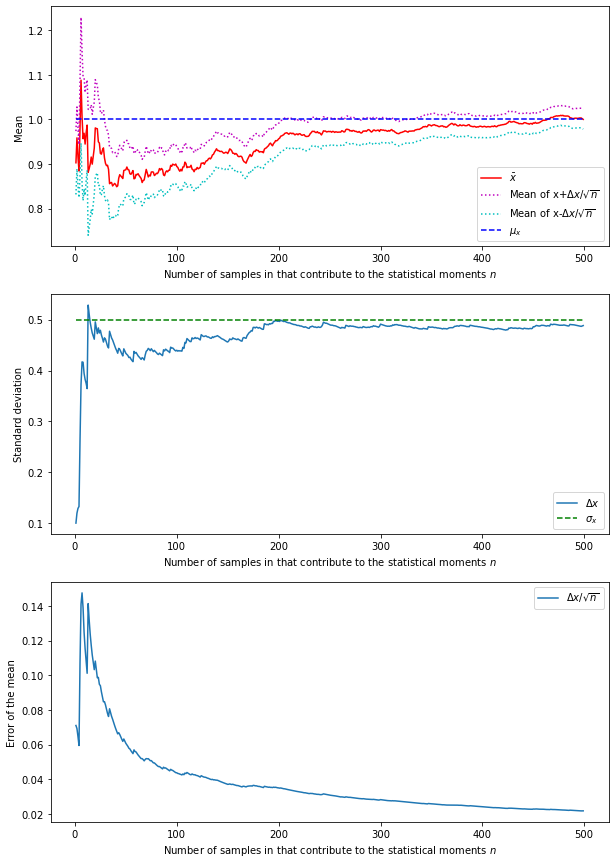

In [6]:
exp_n = np.zeros(m-1)+exp
std_n = np.zeros(m-1)+std

fig = plt.figure(
    figsize=(10,15),
    facecolor='white')
plt.subplot(311)
plt.xlabel(r'Number of samples in that contribute to the statistical moments $n$')
plt.ylabel('Mean')
plt.plot(n_c,mu, 'r', label=r'$\bar{x}$')
plt.plot(n_c,mu+s_mu, 'm:', label=r'Mean of x+$\Delta x /\sqrt{n}$')
plt.plot(n_c,mu-s_mu, 'c:', label=r'Mean of x-$\Delta x /\sqrt{n}$')
plt.plot(n_c,exp_n, 'b--', label=r'$\mu_x$')
plt.legend(loc = 'lower right')
plt.subplot(312)
plt.xlabel(r'Number of samples in that contribute to the statistical moments $n$')
plt.ylabel('Standard deviation')
plt.plot(n_c,es, label=r'$\Delta x$')
plt.plot(n_c,std_n, 'g--', label=r'$\sigma_x$')
plt.legend()
plt.subplot(313)
plt.xlabel(r'Number of samples in that contribute to the statistical moments $n$')
plt.ylabel('Error of the mean')
plt.plot(n_c,s_mu, label=r'$\Delta x/\sqrt{n}$')
plt.legend()
plt.show()

# Print results of the "measurement"

In [7]:
print('Number of measurements of x: %d' %m )
print('Mean of x: %0.2f +/- %0.2f' %(mu[m-2],s_mu[m-2]))
print('Empirical standard deviation of x: %0.2f' %es[m-2])

Number of measurements of x: 500
Mean of x: 1.00 +/- 0.02
Empirical standard deviation of x: 0.49
